### Import dataset

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df1 = pd.read_csv('/content/drive/MyDrive/bitamin_12_conf/독립변수/final_elec.csv')
df2 = pd.read_csv('/content/drive/MyDrive/bitamin_12_conf/독립변수/final_gas.csv', encoding = 'cp949')
df3 = pd.read_csv('/content/drive/MyDrive/bitamin_12_conf/탄소배출권/final_kau.csv')

In [20]:
df1

,Date,설비용량(MW),공급능력(MW),최대전력(MW),공급예비력(MW),공급예비율(%)
0,2017-01-01,105866,89861,59234,30627,51.7
1,2017-01-02,105866,92573,72901,19672,27.0
2,2017-01-03,105866,94223,75471,18752,24.8
3,2017-01-04,105866,92353,75778,16575,21.9
4,2017-01-05,105866,92474,76304,16170,21.2
...,...,...,...,...,...,...
2805,2024-08-19,149179,104640,95611,9029,9.4
2806,2024-08-20,149179,105360,97115,8245,8.5
2807,2024-08-21,149185,105236,92623,12613,13.6
2808,2024-08-22,149185,104705,93224,11481,12.3


In [21]:
df2

,date,gas
0,2014-07-28,3.765
1,2014-07-29,3.824
2,2014-07-30,3.786
3,2014-07-31,3.841
4,2014-08-01,3.798
...,...,...
2475,2024-08-19,2.235
2476,2024-08-20,2.198
2477,2024-08-21,2.177
2478,2024-08-22,2.053


In [22]:
df2.rename(columns = {'date' : 'Date'}, inplace = True)

### Merge dataset

In [23]:
df1.columns

Index(['Date', '설비용량(MW)', '공급능력(MW)', '최대전력(MW)', '공급예비력(MW)', '공급예비율(%)'], dtype='object')

In [24]:
combined = pd.merge(df1[['Date', '최대전력(MW)', '공급예비력(MW)', '공급예비율(%)']], df2, on = 'Date', how = 'inner')
combined

,Date,최대전력(MW),공급예비력(MW),공급예비율(%),gas
0,2017-01-02,72901,19672,27.0,NaN
1,2017-01-03,75471,18752,24.8,3.327
2,2017-01-04,75778,16575,21.9,3.267
3,2017-01-05,76304,16170,21.2,3.273
4,2017-01-06,74060,18781,25.4,3.285
...,...,...,...,...,...
1887,2024-08-19,95611,9029,9.4,2.235
1888,2024-08-20,97115,8245,8.5,2.198
1889,2024-08-21,92623,12613,13.6,2.177
1890,2024-08-22,93224,11481,12.3,2.053


In [25]:
df3.rename(columns = {'date': 'Date'}, inplace = True)

In [26]:
total_df = pd.merge(combined, df3[['Date', '종가', '거래량']], on = 'Date', how = 'inner')
total_df

,Date,최대전력(MW),공급예비력(MW),공급예비율(%),gas,종가,거래량
0,2019-07-01,73799,18018,24.4,2.267,"28,150","2,000"
1,2019-07-02,73871,18356,24.8,2.240,"28,150","1,500"
2,2019-07-03,74051,18661,25.2,2.290,"28,100","6,000"
3,2019-07-04,75978,17968,23.6,NaN,"28,150","1,500"
4,2019-07-05,77081,17310,22.5,2.418,"28,150","5,000"
...,...,...,...,...,...,...,...
1277,2024-08-19,95611,9029,9.4,2.235,"9,130","160,576"
1278,2024-08-20,97115,8245,8.5,2.198,"9,100","84,491"
1279,2024-08-21,92623,12613,13.6,2.177,"9,200","264,105"
1280,2024-08-22,93224,11481,12.3,2.053,"9,290","104,771"


In [27]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1282 non-null   object 
 1   최대전력(MW)   1282 non-null   int64  
 2   공급예비력(MW)  1282 non-null   int64  
 3   공급예비율(%)   1282 non-null   float64
 4   gas        1240 non-null   float64
 5   종가         1282 non-null   object 
 6   거래량        1282 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 70.2+ KB


In [28]:
total_df['종가'] = total_df['종가'].str.replace(',', '').astype(float)
total_df['거래량'] = total_df['거래량'].str.replace(',', '').astype(float)

In [29]:
total_df.isnull().sum()

,0
Date,0
최대전력(MW),0
공급예비력(MW),0
공급예비율(%),0
gas,42
종가,0
거래량,0


In [30]:

total_df['gas'].fillna(method = 'bfill', inplace = True)
total_df.isnull().sum()

<ipython-input-30-606966f53434>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  total_df['gas'].fillna(method = 'bfill', inplace = True)


,0
Date,0
최대전력(MW),0
공급예비력(MW),0
공급예비율(%),0
gas,0
종가,0
거래량,0


In [31]:
total_df['diff_close'] = total_df['종가'].pct_change(1)

In [32]:
total_df

,Date,최대전력(MW),공급예비력(MW),공급예비율(%),gas,종가,거래량,diff_close
0,2019-07-01,73799,18018,24.4,2.267,28150.0,2000.0,NaN
1,2019-07-02,73871,18356,24.8,2.240,28150.0,1500.0,0.000000
2,2019-07-03,74051,18661,25.2,2.290,28100.0,6000.0,-0.001776
3,2019-07-04,75978,17968,23.6,2.418,28150.0,1500.0,0.001779
4,2019-07-05,77081,17310,22.5,2.418,28150.0,5000.0,0.000000
...,...,...,...,...,...,...,...,...
1277,2024-08-19,95611,9029,9.4,2.235,9130.0,160576.0,-0.007609
1278,2024-08-20,97115,8245,8.5,2.198,9100.0,84491.0,-0.003286
1279,2024-08-21,92623,12613,13.6,2.177,9200.0,264105.0,0.010989
1280,2024-08-22,93224,11481,12.3,2.053,9290.0,104771.0,0.009783


In [33]:
total_df = total_df.dropna()

In [34]:
total_df.columns

Index(['Date', '최대전력(MW)', '공급예비력(MW)', '공급예비율(%)', 'gas', '종가', '거래량',
       'diff_close'],
      dtype='object')

In [35]:
total_df = total_df[['최대전력(MW)', '공급예비력(MW)', '공급예비율(%)', 'gas', '종가', '거래량',
       'diff_close']]

### Choose dataset & Hyperparameter setting

In [36]:
data, dataname = total_df, 'total_df' # stock_df / total_df
TARGET = "diff_close"                      # "diff_close"
SEQ_SIZE = 60                        # 30 / 60
PRED_SIZE = 20
BATCH_SIZE = 4                    #  4 / 8
HIDDEN_SIZE = 128                # 64 / 128
EPOCHS = 1000

### Make train datset

In [37]:
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column

        if y_end_number > len(dataset):
            break
        tmp_x = dataset.iloc[i:x_end_number, :]  # Adjusted for Pandas
        tmp_y = dataset.iloc[x_end_number:y_end_number, :].loc[:, TARGET]
        x.append(tmp_x.values)  # Convert to numpy array
        y.append(tmp_y.values)  # Convert to numpy array

    return np.array(x), np.array(y)

X, y = split_xy(data, SEQ_SIZE, PRED_SIZE)
print(X[0,:],"\n", y[0])
print("X size : ", X.shape)
print("y size : ", y.shape)

[[ 7.38710000e+04  1.83560000e+04  2.48000000e+01  2.24000000e+00
   2.81500000e+04  1.50000000e+03  0.00000000e+00]
 [ 7.40510000e+04  1.86610000e+04  2.52000000e+01  2.29000000e+00
   2.81000000e+04  6.00000000e+03 -1.77619893e-03]
 [ 7.59780000e+04  1.79680000e+04  2.36000000e+01  2.41800000e+00
   2.81500000e+04  1.50000000e+03  1.77935943e-03]
 [ 7.70810000e+04  1.73100000e+04  2.25000000e+01  2.41800000e+00
   2.81500000e+04  5.00000000e+03  0.00000000e+00]
 [ 7.45110000e+04  1.99230000e+04  2.67000000e+01  2.40300000e+00
   2.82000000e+04  3.00000000e+03  1.77619893e-03]
 [ 7.48470000e+04  1.94320000e+04  2.60000000e+01  2.42500000e+00
   2.82000000e+04  1.50000000e+03  0.00000000e+00]
 [ 7.35820000e+04  2.24170000e+04  3.05000000e+01  2.44400000e+00
   2.82000000e+04  2.00000000e+03  0.00000000e+00]
 [ 7.37620000e+04  2.16190000e+04  2.93000000e+01  2.41600000e+00
   2.82000000e+04  3.00000000e+03  0.00000000e+00]
 [ 7.37200000e+04  2.05020000e+04  2.78000000e+01  2.45300000e+0

### Define X_test

In [38]:
X_test = data.tail(SEQ_SIZE).values.reshape(1, SEQ_SIZE, data.shape[1])
print(X_test)
print("X_test size : ", X_test.shape)

[[[ 6.75580000e+04  1.38720000e+04  2.05000000e+01  2.91800000e+00
    8.64000000e+03  1.07410000e+05  4.65116279e-03]
  [ 7.21340000e+04  1.10200000e+04  1.53000000e+01  2.90600000e+00
    8.65000000e+03  3.65841000e+05  1.15740741e-03]
  [ 7.42440000e+04  1.13530000e+04  1.53000000e+01  3.12900000e+00
    8.68000000e+03  3.68411000e+05  3.46820809e-03]
  [ 7.42510000e+04  1.00960000e+04  1.36000000e+01  3.04500000e+00
    8.67000000e+03  2.85464000e+05 -1.15207373e-03]
  [ 7.61440000e+04  9.32600000e+03  1.22000000e+01  2.95900000e+00
    8.71000000e+03  3.57368000e+05  4.61361015e-03]
  [ 7.56190000e+04  1.12820000e+04  1.49000000e+01  2.88100000e+00
    8.76000000e+03  3.20547000e+05  5.74052813e-03]
  [ 7.39580000e+04  1.28700000e+04  1.74000000e+01  2.78800000e+00
    8.82000000e+03  4.22249000e+05  6.84931507e-03]
  [ 7.68260000e+04  1.06210000e+04  1.38000000e+01  2.90900000e+00
    8.85000000e+03  3.89198000e+05  3.40136054e-03]
  [ 8.00770000e+04  9.09300000e+03  1.14000000e+

### Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = X.reshape(X.shape[0], SEQ_SIZE, data.shape[1])

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test = scaler.transform(X_test)
X_test = X_test.reshape(X_test.shape[0], SEQ_SIZE, data.shape[1])

print("X size : ", X.shape)
print("X_test size : ", X_test.shape)

X size :  (1202, 60, 7)
X_test size :  (1, 60, 7)


### Split train-validation dataset

In [40]:
# to DataLoader
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1, test_size = 0.2)

# to tensor
X_train = torch.tensor(X_train.astype(np.float32), dtype = torch.float32)
X_valid = torch.tensor(X_valid.astype(np.float32), dtype = torch.float32)
y_train = torch.tensor(y_train.astype(np.float32), dtype = torch.float32)
y_valid = torch.tensor(y_valid.astype(np.float32), dtype = torch.float32)

# to DataLoader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(TensorDataset(X_valid, y_valid), batch_size = BATCH_SIZE, shuffle = False)

### Modeling

In [41]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
from torch.optim.lr_scheduler import ReduceLROnPlateau

import copy
class EarlyStopping:
    def __init__(self, patience = 5, min_delta = 0, restore_best_weights = True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_loss = None
        self.counter = 0
        self.status = ""

    def __call__(self, model, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model = copy.deepcopy(model.state_dict())
        elif self.best_loss - val_loss >= self.min_delta:
            self.best_model = copy.deepcopy(model.state_dict())
            self.best_loss = val_loss
            self.counter = 0
            self.status = f"Improvement found, counter reset to {self.counter}"
        else:
            self.counter += 1
            self.status = f"No improvement in the last {self.counter} epochs"
            if self.counter >= self.patience:
                self.status = f"Early stopping triggered after {self.counter} epochs."
                if self.restore_best_weights:
                    model.load_state_dict(self.best_model)
                return True
        return False

class LSTMModel(nn.Module):
    def __init__(self,input_dim):
        super(LSTMModel,self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size = HIDDEN_SIZE, batch_first = True)
        self.dropout = nn.Dropout(0.2)
        self.seq = nn.Sequential(nn.Linear(HIDDEN_SIZE, 32),
                                nn.ReLU(),
                                nn.Linear(32, 32),
                                nn.ReLU(),
                                nn.Linear(32, 32),
                                nn.ReLU(),
                                nn.Linear(32, 32),
                                nn.ReLU(),
                                nn.Linear(32, PRED_SIZE)
                                )

    def forward(self,x):
        x,_ = self.lstm(x)
#         print('output of lstm :',x.size()) # torch.Size([1, 120, 64])
        x = self.dropout(x[:,-1,:])
#         print('from lstm to linear :',x.size()) # torch.Size([1, 64])
        x = self.seq(x)
        return x

class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()
        self.mse = nn.MSELoss()

    def forward(self,yhat,y):
        return torch.sqrt(self.mse(yhat,y))

In [42]:
model = LSTMModel(X_train.shape[2])
criterion = RMSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor = 0.1, patience = 20, verbose = True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


### RUN!!

In [43]:
epoch_counter = 0
patience = 30
best_loss = float('inf')
done = False
es = EarlyStopping(patience=patience)
tr_losses_fp, val_losses_fp = [],[]

while not done and epoch_counter<EPOCHS:
    epoch_counter+=1

    # train
    model.train()
    train_losses = []
    for x_batch,y_batch in train_loader:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output,y_batch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    train_loss = np.mean(train_losses)
    tr_losses_fp.append(train_loss)

    # validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            output = model(x_batch)
            loss = criterion(output, y_batch)
            val_losses.append(loss.item())
    val_loss = np.mean(val_losses)
    val_losses_fp.append(val_loss)
    scheduler.step(val_loss)

    if es(model, val_loss):
        done = True

    if val_loss < best_loss:
        best_loss = val_loss

    print(f"Epoch {epoch_counter}/{EPOCHS}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

Epoch 1/1000, Train Loss: 0.0431, Validation Loss: 0.0336
Epoch 2/1000, Train Loss: 0.0337, Validation Loss: 0.0338
Epoch 3/1000, Train Loss: 0.0334, Validation Loss: 0.0334
Epoch 4/1000, Train Loss: 0.0332, Validation Loss: 0.0337
Epoch 5/1000, Train Loss: 0.0333, Validation Loss: 0.0334
Epoch 6/1000, Train Loss: 0.0335, Validation Loss: 0.0333
Epoch 7/1000, Train Loss: 0.0333, Validation Loss: 0.0334
Epoch 8/1000, Train Loss: 0.0330, Validation Loss: 0.0332
Epoch 9/1000, Train Loss: 0.0331, Validation Loss: 0.0336
Epoch 10/1000, Train Loss: 0.0328, Validation Loss: 0.0331
Epoch 11/1000, Train Loss: 0.0329, Validation Loss: 0.0334
Epoch 12/1000, Train Loss: 0.0329, Validation Loss: 0.0333
Epoch 13/1000, Train Loss: 0.0326, Validation Loss: 0.0331
Epoch 14/1000, Train Loss: 0.0326, Validation Loss: 0.0332
Epoch 15/1000, Train Loss: 0.0323, Validation Loss: 0.0328
Epoch 16/1000, Train Loss: 0.0324, Validation Loss: 0.0328
Epoch 17/1000, Train Loss: 0.0321, Validation Loss: 0.0326
Epoch 

In [44]:
print(f"Best validation loss : {best_loss}")

Best validation loss : 0.025546678738882306


### Visualize train-validation loss

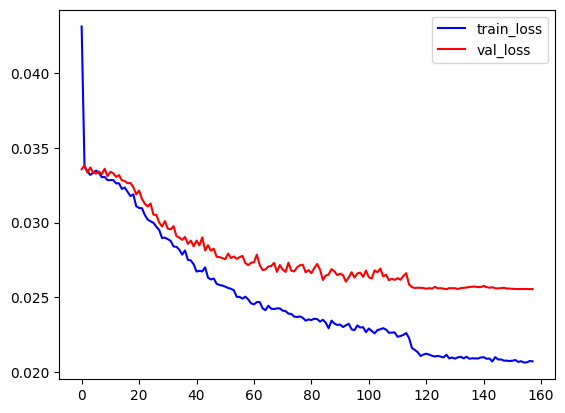

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(len(tr_losses_fp)),tr_losses_fp,color='blue',label='train_loss')
plt.plot(range(len(val_losses_fp)),val_losses_fp,color='red',label='val_loss')
plt.legend()
plt.show()

### Prediction

In [46]:
# evaluation
model.eval()
with torch.no_grad():
    X_test = torch.tensor(X_test.astype(np.float32), dtype = torch.float32)
    pred = model(X_test)

pred = pred.detach().numpy()
print(pred)

[[-0.00085496 -0.00081441 -0.00108656 -0.00158983 -0.00602302 -0.00156581
   0.00524227  0.00687458  0.00494483  0.00437425  0.00461407  0.00245477
   0.00126242  0.00464103  0.00748815  0.00705674  0.00675387  0.00439023
   0.00396311  0.0048017 ]]


In [47]:
if TARGET == "diff_close" :
    endPrice = data['종가'].iloc[-1]
    pred_close = []

    for i in pred[0] :
        endPrice = endPrice + endPrice*i
        pred_close.append(endPrice)

    pred = np.array(pred_close).reshape(1, PRED_SIZE)
    pred
else :
    pass

### Plotting

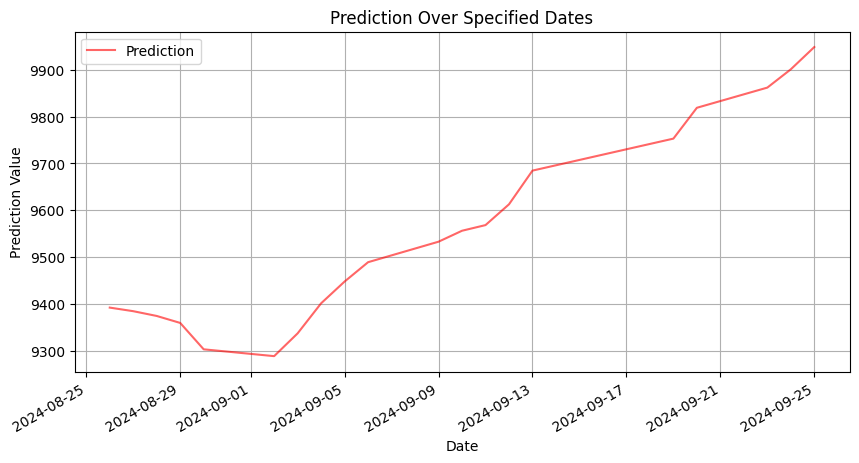

In [53]:
dates = ["2024-08-26", "2024-08-27", "2024-08-28", "2024-08-29", "2024-08-30",
         "2024-09-02", "2024-09-03", "2024-09-04", "2024-09-05", "2024-09-06",
         "2024-09-09", "2024-09-10", "2024-09-11", "2024-09-12", "2024-09-13",
         "2024-09-19", "2024-09-20", "2024-09-23", "2024-09-24", "2024-09-25"]

# Convert dates to pandas datetime for better handling in plotting
date_indices = pd.to_datetime(dates)
pred = np.array(pred).reshape(PRED_SIZE)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(date_indices, pred, color='red', alpha=0.6, label='Prediction')
plt.legend()
plt.gcf().autofmt_xdate()  # Auto-format the dates for better readability
plt.title("Prediction Over Specified Dates")
plt.xlabel("Date")
plt.ylabel("Prediction Value")
plt.grid(True)
plt.show()

In [52]:
pd.DataFrame(pred, columns = ['Predicted_Close'])

,Predicted_Close
0,9391.963370
1,9384.314479
2,9374.117901
3,9359.214604
4,9302.843836
5,9288.277330
6,9336.968949
7,9401.156723
8,9447.643838
9,9488.970227
